In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("./data/simulation.csv", index_col=0)

In [35]:
df.head()

,x-position,y-position,time,squared
Particles,,,,
Particles0,8.132392,-2.324624,0,NaN
Particles1,7.741885,-8.253783,0,NaN
Particles2,8.713162,0.508464,0,NaN
Particles3,5.891736,-3.083270,0,NaN
Particles4,-8.858789,7.165523,0,NaN


In [36]:
df_boundary = df.iloc[:,-1:]
name = list(df_boundary.keys())

In [37]:
df = df[['x-position','y-position','time']]
df.head()

,x-position,y-position,time
Particles,,,
Particles0,8.132392,-2.324624,0
Particles1,7.741885,-8.253783,0
Particles2,8.713162,0.508464,0
Particles3,5.891736,-3.083270,0
Particles4,-8.858789,7.165523,0


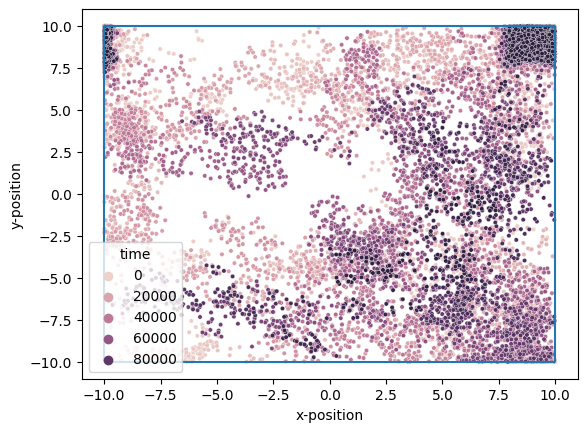

In [38]:
sns.scatterplot(data = df ,x = 'x-position', y = 'y-position', hue = "time", s = 10.0)
if name[0] == 'squared':
    # squared
    plt.vlines(x = 10, ymin = -10.0, ymax = 10.0)
    plt.vlines(x = -10, ymin = -10.0, ymax = 10.0)
    plt.hlines(y = 10, xmin = -10.0, xmax = 10.0)
    plt.hlines(y = -10, xmin = -10.0, xmax = 10.0)
if name[0] == 'circular':
    # circular
    theta = np.arange(0.0,2.0*np.pi,0.01)
    R = 10.0
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    plt.plot(x,y)